In [1]:
#!/usr/bin/env python
from __future__ import print_function

from astropy.io import ascii, fits
from importlib import reload
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from kcwitools import extract_optimal as e
reload(e)

/Users/bordoloi/WORK/python/kcwitools/kcwitools/__init__.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'nbAgg' by the following code:
  File "/Users/bordoloi/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/bordoloi/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/bordoloi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/bordoloi/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/bordoloi/anaconda3/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_loop.start()
  File "

<module 'kcwitools.extract_optimal' from '/Users/bordoloi/WORK/python/kcwitools/kcwitools/extract_optimal.py'>

In [2]:
##Now READ In KCWI Data Cube
filename='/Users/bordoloi/Dropbox/KCWI/LensedArc/Coadded_Data_cube.fits';
filenamevar='/Users/bordoloi/Dropbox/KCWI/LensedArc/Coadded_Data_sigma_cube.fits';
filenamewave='/Users/bordoloi/Dropbox/KCWI/LensedArc/arcwave.fits';

hdu = fits.open(filename)
hdu_hdr = hdu['PRIMARY'].header

#Flux
flux = hdu['PRIMARY'].data
hdu = fits.open(filenamevar)

#variance
varcube = hdu['PRIMARY'].data
hdu = fits.open(filenamewave)
#variance
wave = hdu['PRIMARY'].data

# READ In the actual header
filename='/Users/bordoloi/Dropbox/KCWI/LensedArc/KCWI_0718/Data/kb180708_00063_icubes.fits';
hdu = fits.open(filename)
hdu_hdr = hdu['PRIMARY'].header
#hdu_hdr


# REMEMBER X and Y and transposed in python image plotting.
# Therefore flip x and y while plotting
x1=22;
x2=26;
y1=0;
y2=10;
whitelight=np.sum(flux, axis=0)



<IPython.core.display.Javascript object>


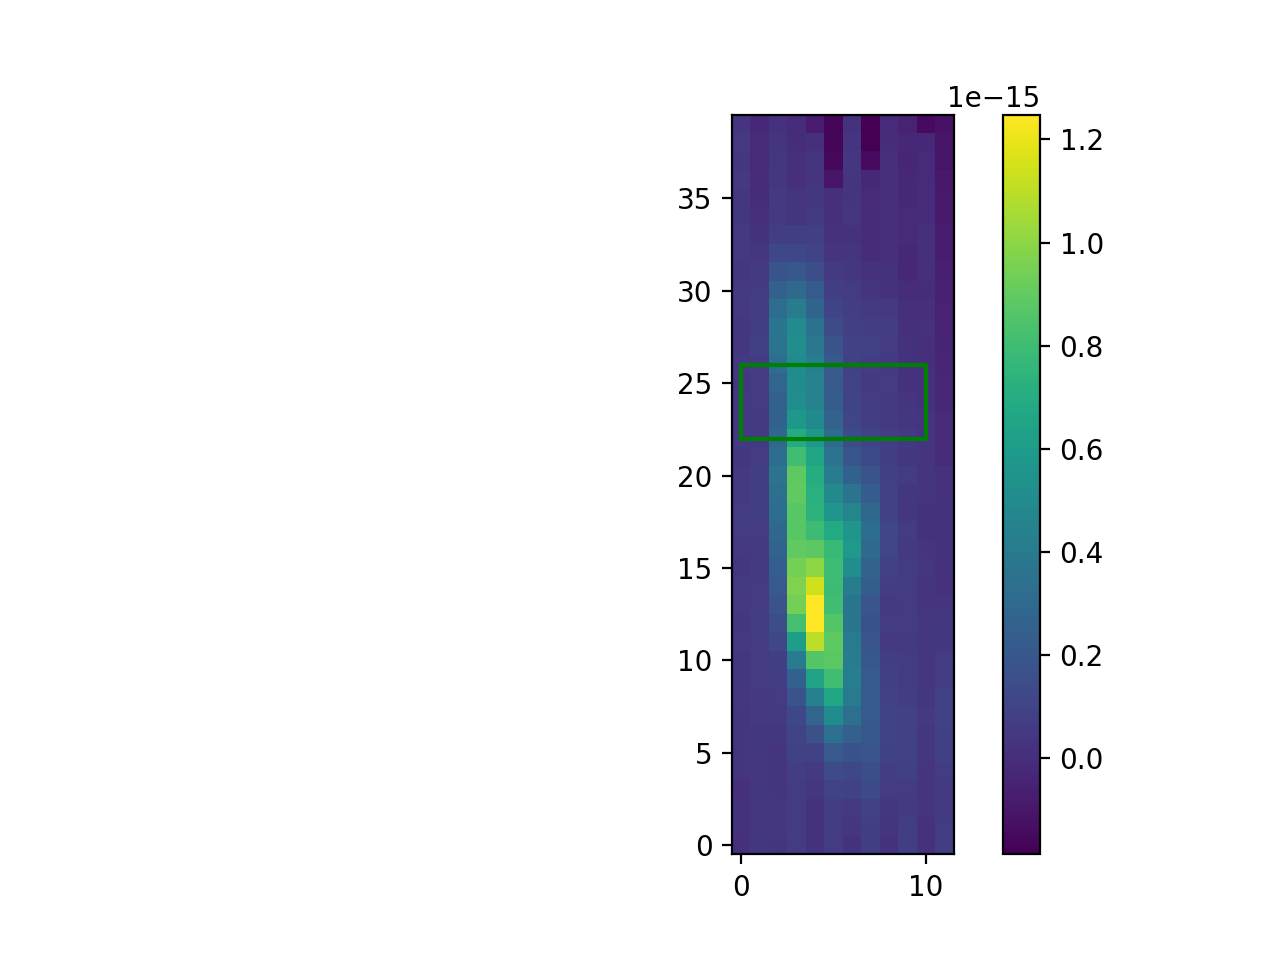

In [3]:
# Plot the data cube with the extraction region
plt.imshow(whitelight,cmap=plt.get_cmap('viridis'),origin="lower")
#plt.ylim([0,60])
#plt.xlim([0,45])
#plt.clim([0,1e-17])
plt.colorbar()

plt.plot([y1,y1,y2,y2,y1],[x1,x2,x2,x1,x1],'g')



<IPython.core.display.Javascript object>


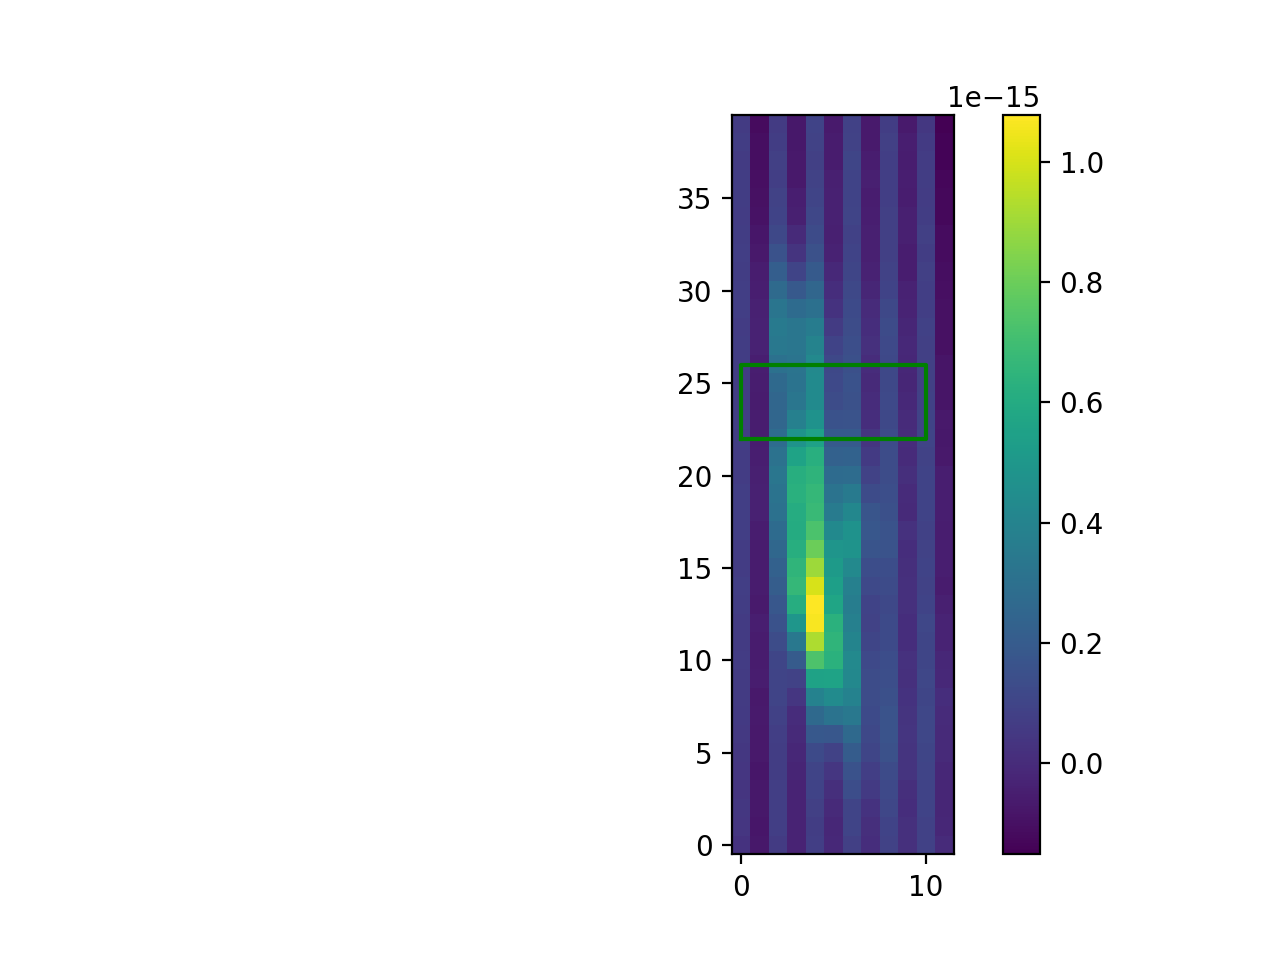

/Users/bordoloi/WORK/python/linetools/linetools/spectra/xspectrum1d.py:108: UserWarning: Assuming wavelength unit is Angstroms
  warnings.warn("Assuming wavelength unit is Angstroms")


<IPython.core.display.Javascript object>


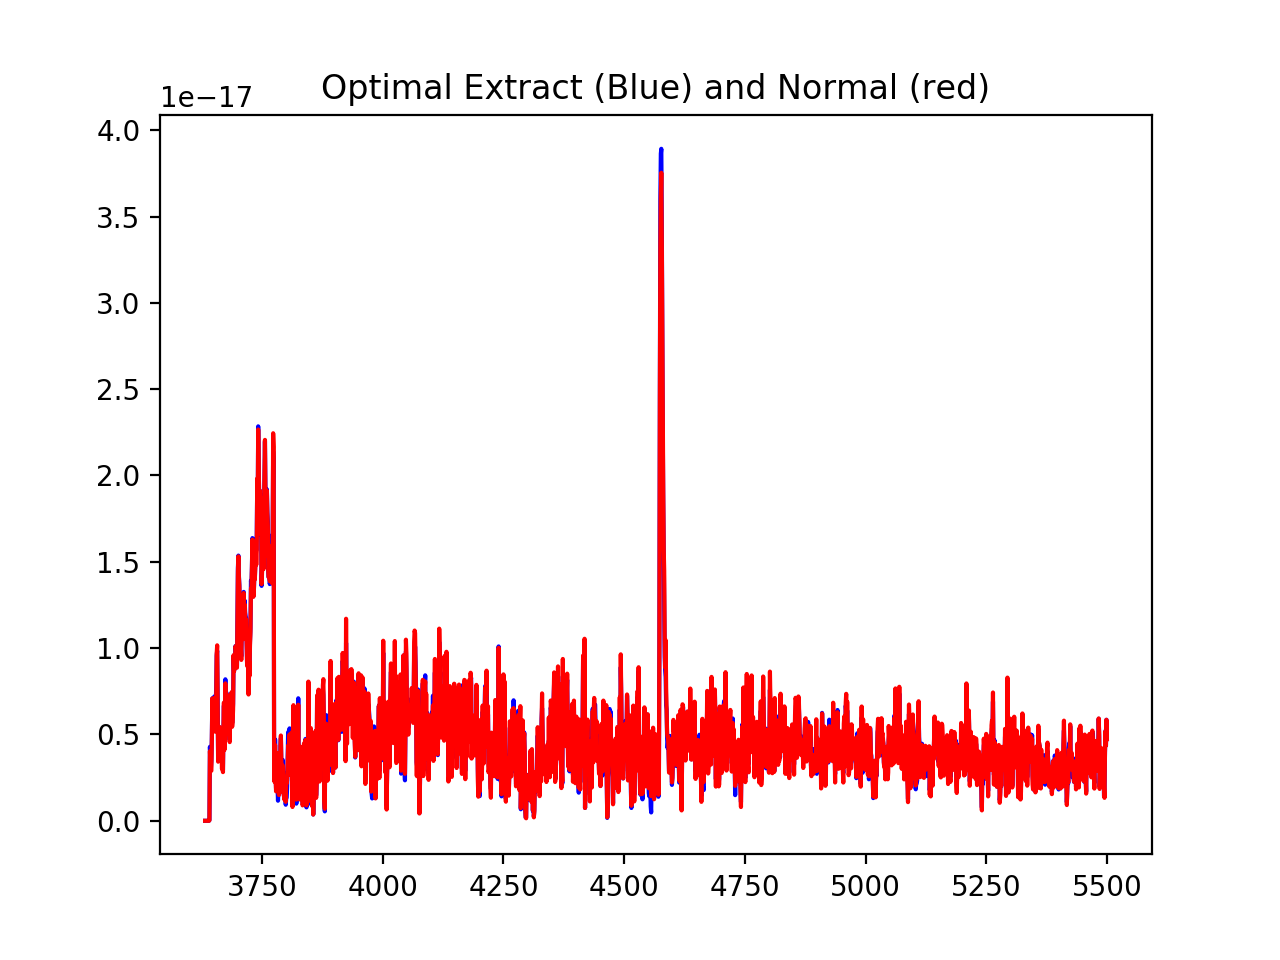

In [8]:
# Now do optimal extraction

xspec,xspec_std=e.extract_optimal_1D(flux, varcube,hdu_hdr,wave,x1,x2,y1,y2,plot=True)


<IPython.core.display.Javascript object>


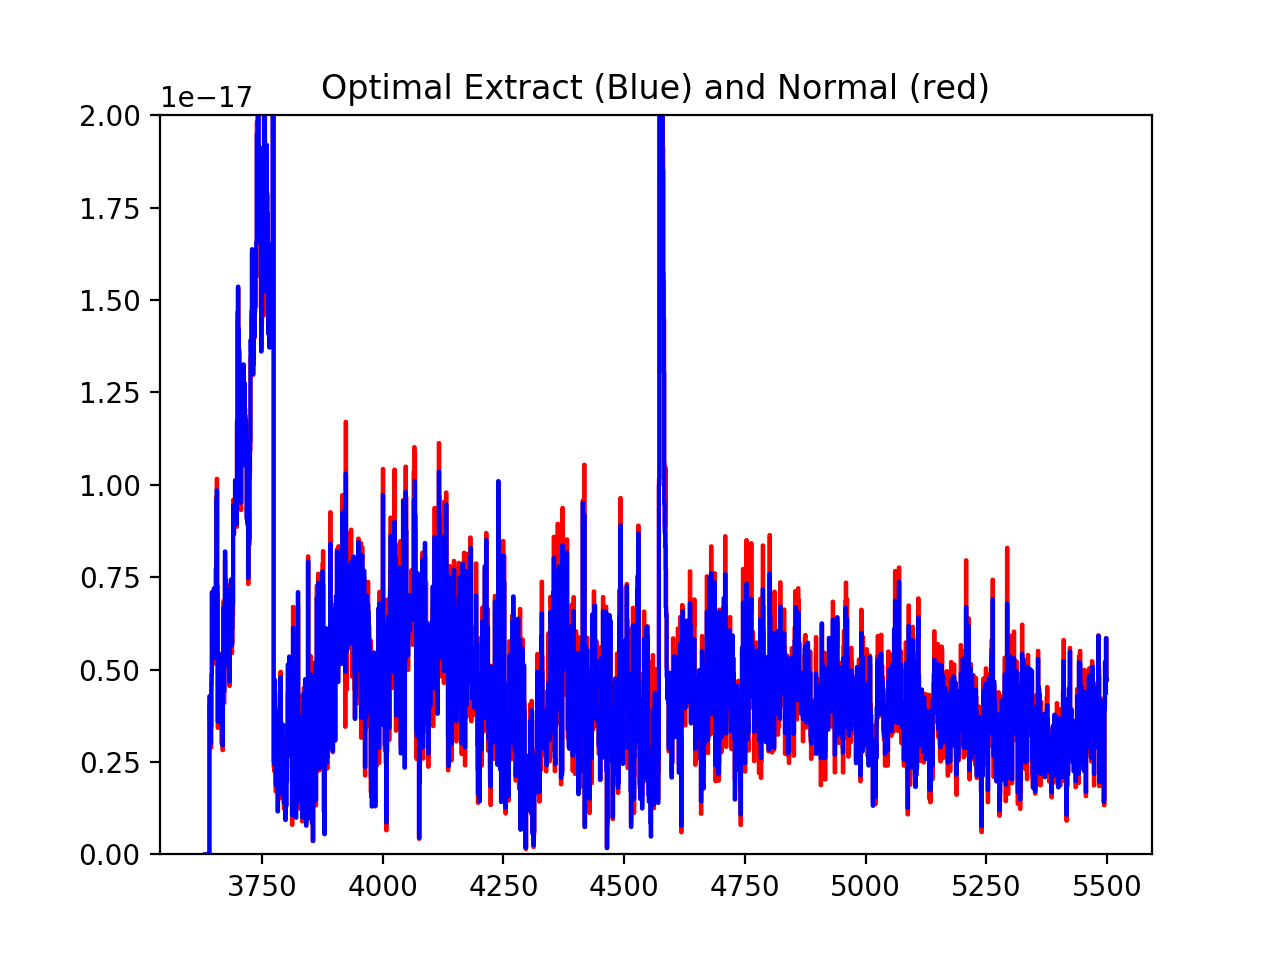

Text(0.5,1,'Optimal Extract (Blue) and Normal (red)')

In [9]:
plt.step(xspec_std.wavelength.value,xspec_std.flux.value,'r')
plt.step(xspec.wavelength.value,xspec.flux.value,'b')
plt.ylim([0,2e-17])
plt.title("Optimal Extract (Blue) and Normal (red)")
